# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:* Виктория
*Фамилия:* Макарова
*Электронная почта:* makarova_vs@mgpu.ru



In [58]:
# imports and setup
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import norm


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

In [59]:
from google.colab import files

uploaded = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data (1).csv


In [60]:
aqi=pd.read_csv('ad_viz_plotval_data.csv', delimiter=',')
aqi


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,12/27/2023,AQS,490450004,3,15.5,ug/m3 LC,58,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6510,12/28/2023,AQS,490450004,3,17.6,ug/m3 LC,63,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6511,12/29/2023,AQS,490450004,3,19.3,ug/m3 LC,66,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6512,12/30/2023,AQS,490450004,3,26.6,ug/m3 LC,81,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780


In [61]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

In [62]:
aqi.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
std,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387
min,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222


In [63]:
aqi['Date'] = pd.to_datetime(aqi['Date'])

In [64]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

In [65]:
aqi.sort_values (by='Date')
aqi

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-02,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,2023-01-03,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,2023-01-04,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,2023-01-05,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,2023-12-27,AQS,490450004,3,15.5,ug/m3 LC,58,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6510,2023-12-28,AQS,490450004,3,17.6,ug/m3 LC,63,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6511,2023-12-29,AQS,490450004,3,19.3,ug/m3 LC,66,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6512,2023-12-30,AQS,490450004,3,26.6,ug/m3 LC,81,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780


# Проверка на нормальность

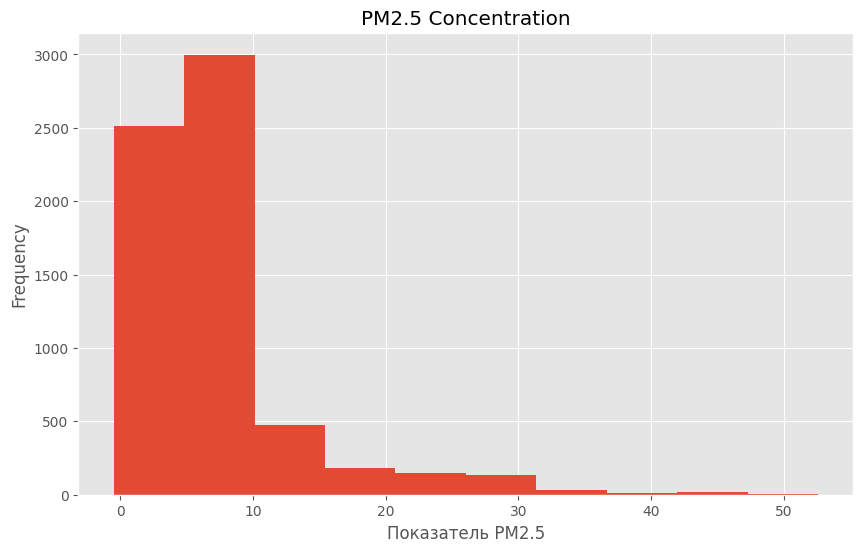

In [66]:
plt.hist(aqi['Daily Mean PM2.5 Concentration']) # Use bins defined by np.arange(0,100,4)
#plt.hist(ages) # Use 10 bins
plt.title("PM2.5 Concentration")
plt.xlabel("Показатель PM2.5")
plt.ylabel("Frequency")
plt.show()

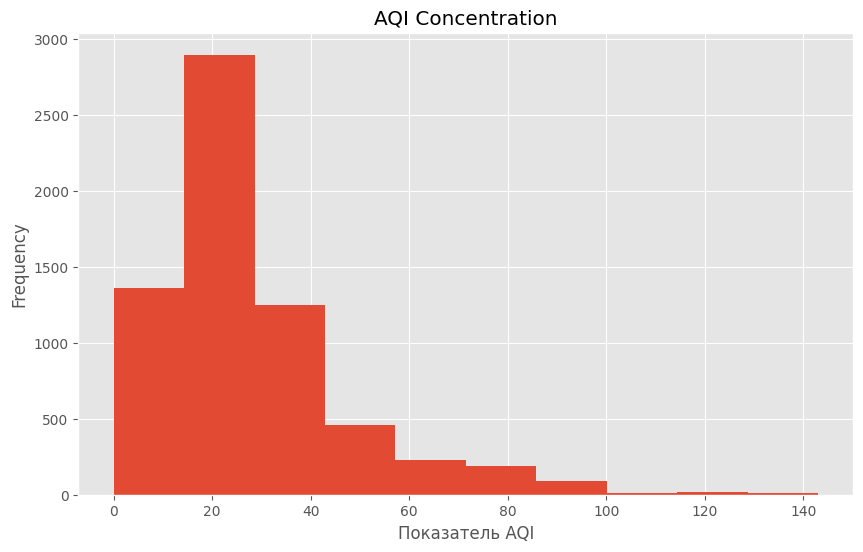

In [67]:
plt.hist(aqi['DAILY_AQI_VALUE']) # Use bins defined by np.arange(0,100,4)
#plt.hist(ages) # Use 10 bins
plt.title("AQI Concentration")
plt.xlabel("Показатель AQI")
plt.ylabel("Frequency")
plt.show()

Вычислим дисперсию и стандартное отклонение для показателей: PM2.5 и AQI

In [68]:
print(np.var(aqi['Daily Mean PM2.5 Concentration']))
print(np.std(aqi['Daily Mean PM2.5 Concentration']))

39.42622110272115
6.279030267702263


In [69]:
print(np.var(aqi['DAILY_AQI_VALUE']))
print(np.std(aqi['DAILY_AQI_VALUE']))

372.378363731163
19.297107651955592


Тест Шапиро-Уилк

In [70]:
from scipy import stats

stat, p = stats.shapiro(aqi['Daily Mean PM2.5 Concentration'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.717, p-value=0.000
Отклонить гипотезу о нормальности


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Критерий согласия Пирсона

In [71]:
stat, p = stats.normaltest(aqi['DAILY_AQI_VALUE'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=2327.715, p-value=0.000
Отклонить гипотезу о нормальности


Подсчет уникальных значений по столбцам

In [72]:
aqi.nunique ()

Date                              365
Source                              2
Site ID                             9
POC                                 5
Daily Mean PM2.5 Concentration    360
UNITS                               1
DAILY_AQI_VALUE                   124
Site Name                           9
DAILY_OBS_COUNT                     1
PERCENT_COMPLETE                    1
AQS_PARAMETER_CODE                  1
AQS_PARAMETER_DESC                  1
CBSA_CODE                           1
CBSA_NAME                           1
STATE_CODE                          1
STATE                               1
COUNTY_CODE                         2
COUNTY                              2
SITE_LATITUDE                       9
SITE_LONGITUDE                      9
dtype: int64

### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


Группируем данные по дате и  вычисляем средние значения для показателя  PM2.5 и AQI

In [73]:
grouped_aqi = aqi.groupby('Date').mean('Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE')
grouped_aqi

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,
2023-01-01,4.903638e+08,2.166667,3.494444,14.611111,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-01-02,4.903638e+08,2.166667,2.638889,11.000000,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-01-03,4.903638e+08,2.166667,9.661111,40.111111,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-01-04,4.903638e+08,2.166667,7.277778,30.277778,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-01-05,4.903638e+08,2.166667,2.538889,10.555556,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4.903638e+08,2.166667,15.311111,57.722222,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-12-28,4.903638e+08,2.166667,22.400000,72.666667,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-12-29,4.903638e+08,2.166667,24.122222,76.222222,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446


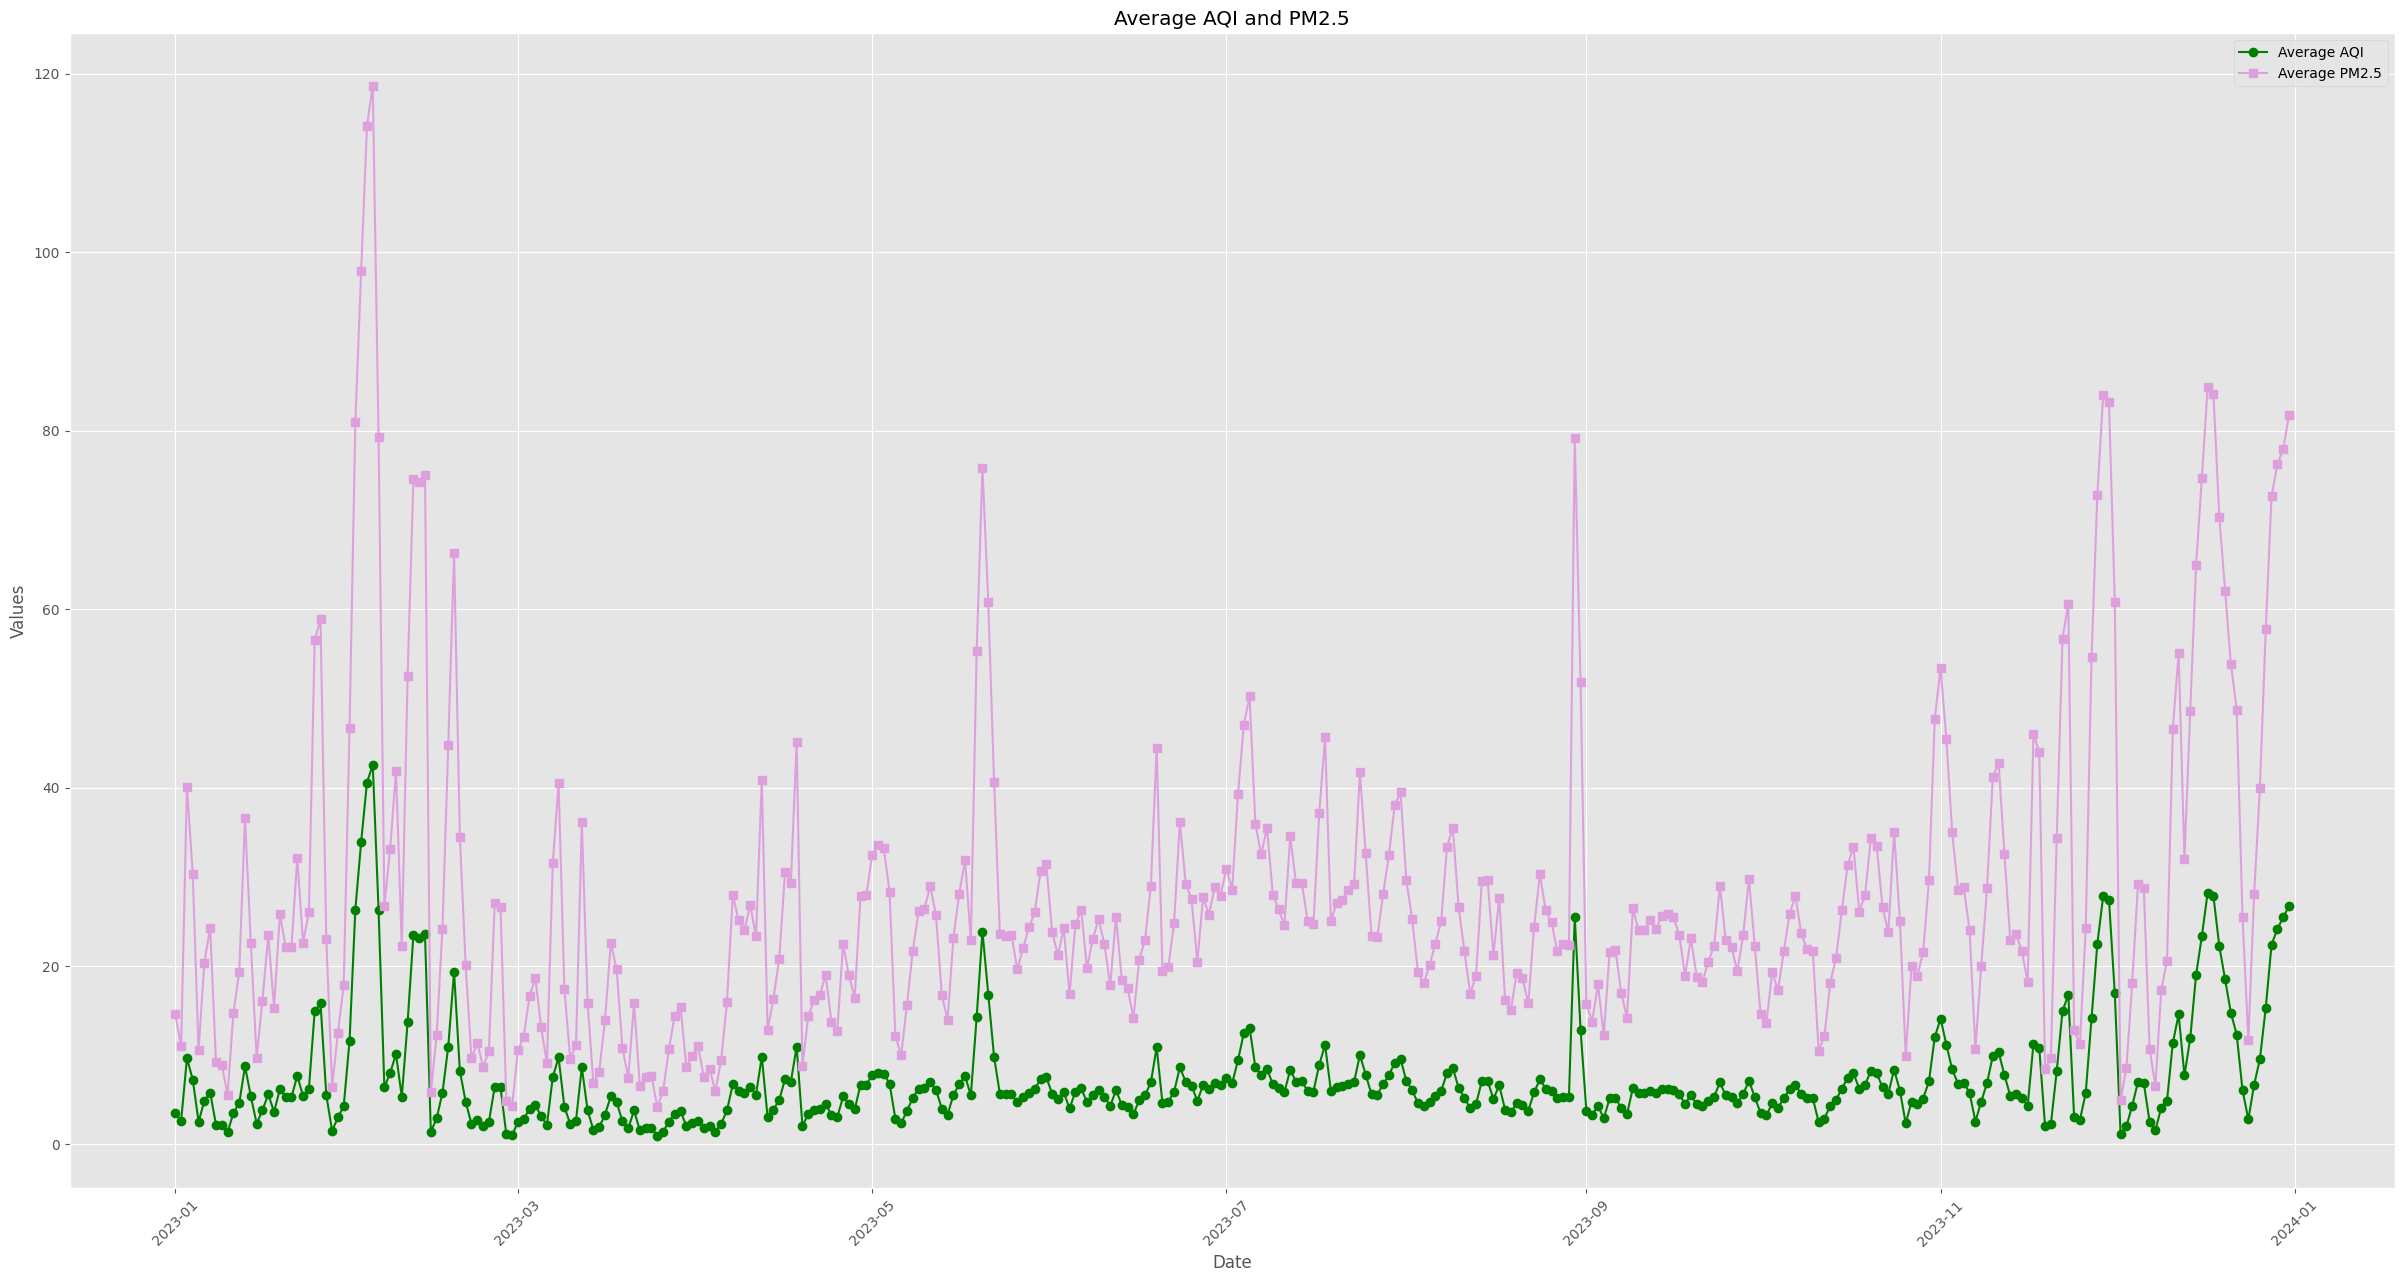

In [74]:
plt.figure(figsize=(30, 15))
plt.plot(grouped_aqi.index, grouped_aqi['Daily Mean PM2.5 Concentration'], marker='o', label='Average AQI', color='green')
plt.plot(grouped_aqi.index, grouped_aqi['DAILY_AQI_VALUE'], marker='s', label='Average PM2.5', color='plum')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Average AQI and PM2.5')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Фильтруем по значение SITE ID 490352005 и 490353015

In [75]:
df_siteid = aqi[(aqi['Site ID'] == 490352005) | (aqi['Site ID'] == 490353015)]
df_siteid

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-02,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,2023-01-03,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,2023-01-04,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,2023-01-05,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2023-12-27,AQS,490353015,3,12.8,ug/m3 LC,52,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4701,2023-12-28,AQS,490353015,3,21.7,ug/m3 LC,71,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4702,2023-12-29,AQS,490353015,3,25.9,ug/m3 LC,80,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849
4703,2023-12-30,AQS,490353015,3,27.7,ug/m3 LC,84,Utah Technical Center,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.777145,-111.945849


In [76]:
grouped_siteid = df_siteid.groupby(['Date','Site ID','POC']).mean('Daily Mean PM2.5 Concentration').reset_index()
grouped_siteid

,Date,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,490352005,1,4.6,19.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.598056,-111.894167
1,2023-01-01,490352005,4,5.3,22.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.598056,-111.894167
2,2023-01-01,490353015,1,3.5,15.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.777145,-111.945849
3,2023-01-01,490353015,3,2.8,12.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.777145,-111.945849
4,2023-01-02,490352005,1,4.0,17.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,2023-12-30,490353015,3,27.7,84.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.777145,-111.945849
1439,2023-12-31,490352005,1,32.1,93.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.598056,-111.894167
1440,2023-12-31,490352005,4,30.2,89.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.598056,-111.894167
1441,2023-12-31,490353015,1,29.8,88.0,1.0,100.0,88101.0,41620.0,49.0,35.0,40.777145,-111.945849


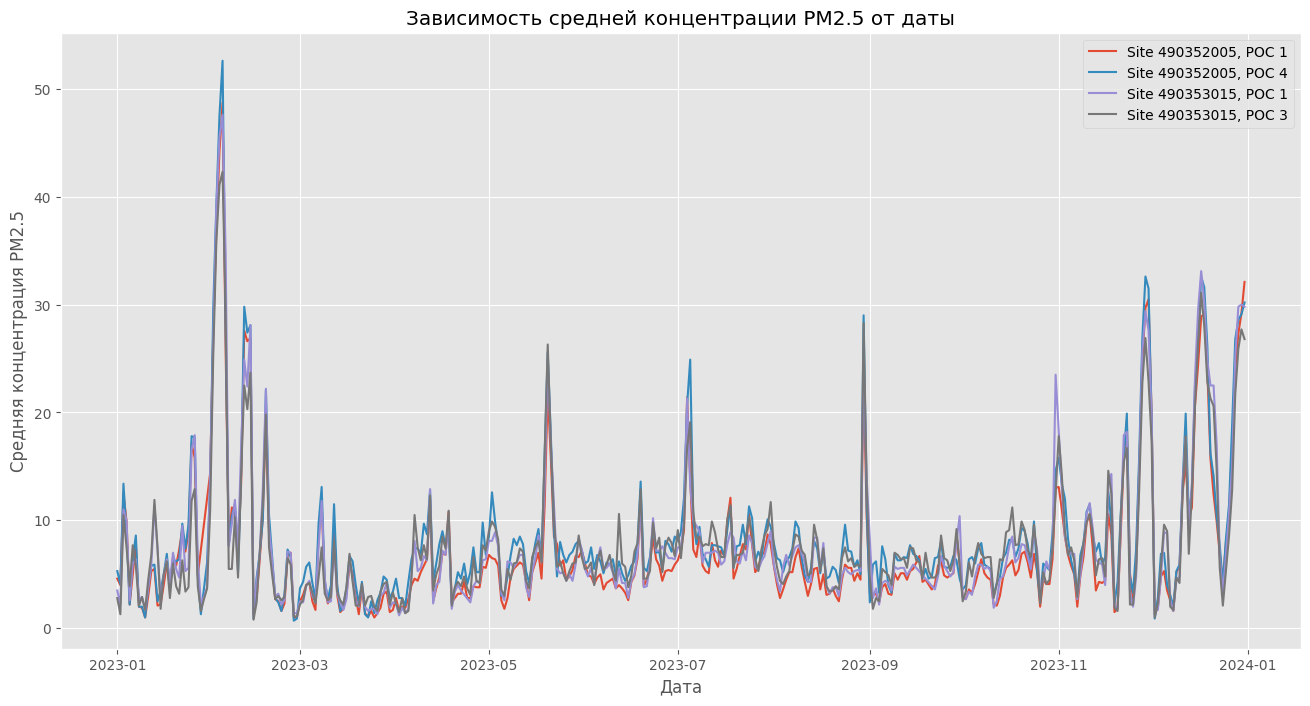

In [77]:
plt.figure(figsize=(16, 8))

for site_id in [490352005, 490353015]:
    data_subset = grouped_siteid[grouped_siteid['Site ID'] == site_id]
    for poc in data_subset['POC'].unique():
        subset = data_subset[data_subset['POC'] == poc]
        plt.plot(subset['Date'], subset['Daily Mean PM2.5 Concentration'], label=f'Site {site_id}, POC {poc}')

plt.xlabel('Дата')
plt.ylabel('Средняя концентрация PM2.5')
plt.title('Зависимость средней концентрации PM2.5 от даты')
plt.legend()
plt.grid(True)
plt.show()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

Берем датафрейм grouped_aqi сгруппированный по дням

In [47]:
rolling_avg = grouped_aqi.rolling(window=5).mean()
rolling_avg


,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,4.903638e+08,2.166667,5.122222,21.311111,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,4.903638e+08,2.166667,8.098889,32.588889,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-12-28,4.903638e+08,2.166667,11.360000,42.022222,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446
2023-12-29,4.903638e+08,2.166667,15.623333,54.933333,1.0,100.0,88101.0,41620.0,49.0,36.111111,40.686094,-111.987446


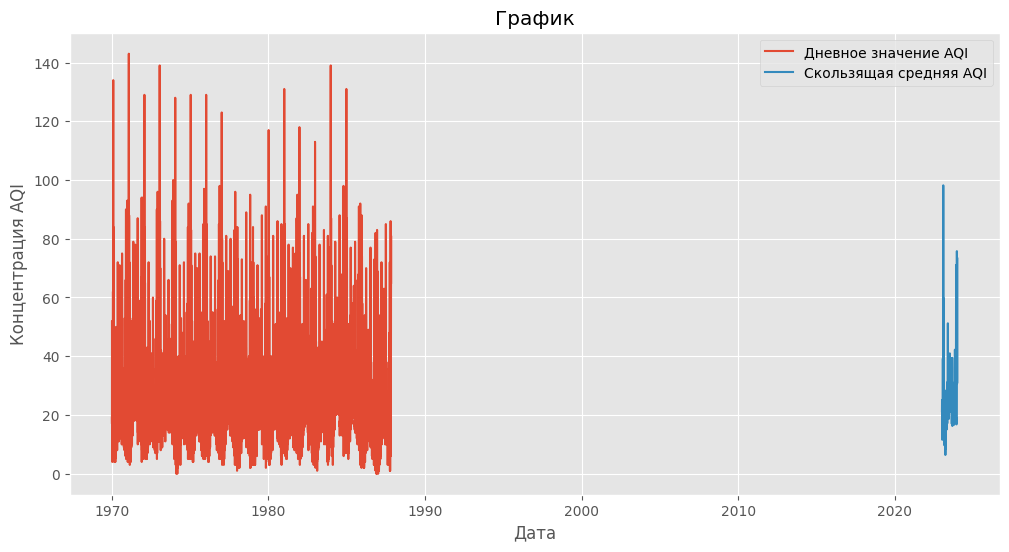

In [81]:

plt.figure(figsize=(12, 6))
plt.plot(aqi["DAILY_AQI_VALUE"], label="Дневное значение AQI")
plt.plot(rolling_avg["DAILY_AQI_VALUE"], label="Cкользящая средняя AQI")
plt.title("График")
plt.xlabel("Дата")
plt.ylabel("Концентрация AQI")
plt.legend()
plt.show()

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:**
$p_A = n_A/N_A$=800/3000=0,27

$p_B = n_B/N_B$=1000/3000=0,33

дельта= 0,33-0,27=0,06

Мы принимаем нулевую гипотезу
$$
H_0: p_A  \leq p_B
$$
и что альтернативная гипотеза
$$
H_a:p_A > p_A.
$$
Устанавливаем уровень значимости, скажем, $\alpha = 1\%$


### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [ ]:
p = (3000*(800/3000)/(3000+3000))+ (3000*(1000/3000)/(3000+3000))
print(p)
q = 1-p
print(q)

z= (800/3000-1000/3000)/np.sqrt(p*q*1/3000+1/3000)
print(z)

0.3
0.7
-3.31953065154646


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [ ]:
print(1 - norm.cdf(z, loc=0, scale=1))



from statsmodels.stats.proportion import proportions_ztest


print(proportions_ztest(count=800, nobs=3000, value=0.3))

print(proportions_ztest(count=1000, nobs=3000, value=0.3))

0.9995491554731024
(-4.128614119223851, 3.6495629426551016e-05)
(3.872983346207416, 0.00010751117672950086)


Поскольку значение $P$ $= 0.999 > 0.01 = \alpha$, нулевую гипотеза подтверждается на выбранном уровне значимости. Делаем вывод, что логотип B лучше.